In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
ride=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_ride=pd.merge(ride,city,on="city",how="left")
# Display the data table for preview
city_ride.head(60)
city_ride["city"].value_counts()

West Angela             39
South Karenland         38
North Jason             35
Port Frank              33
Liumouth                33
South Michelleport      31
South Evanton           31
South Phillip           31
West Robert             31
New Kimberlyborough     30
North Jasmine           30
Royland                 30
Justinberg              30
West Anthony            30
East Kaylahaven         29
Loganberg               28
Karenside               28
Hurleymouth             28
Richardfort             28
West Heidi              28
Josephside              27
Carriemouth             27
Christopherfurt         27
East Marymouth          27
West Josephberg         26
West Christopherberg    26
Lake Danielberg         26
Raymondhaven            25
Port Samanthamouth      25
West Samuelburgh        25
                        ..
Williamsonville         14
North Richardhaven      14
Victoriaport            14
North Markport          14
Lake Omar               14
North Jeffrey           13
E

In [2]:
urban=city_ride.loc[city_ride["type"]=="Urban"]
suburban=city_ride.loc[city_ride["type"]=="Suburban"]
rural=city_ride.loc[city_ride["type"]=="Rural"]


## Bubble Plot of Ride Sharing Data

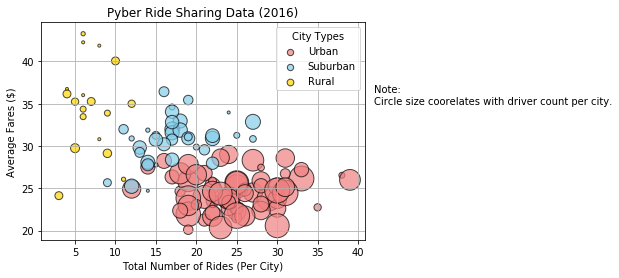

In [7]:
# Obtain the x and y coordinates for each of the three city 
urban_g=urban.groupby("city")
u_average_fare=urban_g["fare"].mean()
u_driver_count=(urban_g["driver_count"].mean())*9
u_ride_count=urban_g["ride_id"].count()

suburban_g=suburban.groupby("city")
s_average_fare=suburban_g["fare"].mean()
s_driver_count=(suburban_g["driver_count"].mean())*9
s_ride_count=suburban_g["ride_id"].count()

rural_g=rural.groupby("city")
r_average_fare=rural_g["fare"].mean()
r_driver_count=(rural_g["driver_count"].mean())*9
r_ride_count=rural_g["ride_id"].count()


# Build the scatter plots for each city types

u=plt.scatter(u_ride_count,u_average_fare,s=u_driver_count,color="lightCoral",alpha=0.7,edgecolor="black",linewidths=1,label="Urban")
s=plt.scatter(s_ride_count,s_average_fare,s=s_driver_count,color="skyblue",alpha=0.7,edgecolor="black",linewidths=1,label="Suburban")
r=plt.scatter(r_ride_count,r_average_fare,s=r_driver_count,color="gold",alpha=0.7,edgecolor="black",linewidths=1,label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")

# Create a legend

legend_bubble=plt.legend(title="City Types")
legend_bubble.legendHandles[0]._sizes = [40]
legend_bubble.legendHandles[1]._sizes = [40]
legend_bubble.legendHandles[1]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text( 42,35,'Note:\nCircle size coorelates with driver count per city.')
plt.subplots_adjust(left=0.15)
# Save Figure
plt.savefig("../Images/Bubble.png")

In [29]:
# Show plot
plt.show()

## Total Fares by City Type

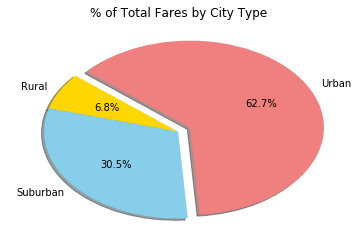

In [34]:
# Calculate Type Percents
type_group=city_ride.groupby("type")
fare_type=type_group["fare"].sum()
total_fare=city_ride["fare"].sum()
fare_percent=fare_type/total_fare
fare_percent
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold","skyblue","lightCoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Save Figure
plt.pie(fare_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
          
plt.savefig("../Images/pie1.png")

In [71]:
# Show Figure
plt.show()

## Total Rides by City Type

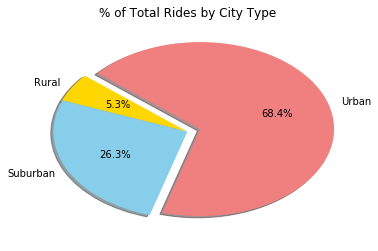

In [31]:
# Calculate Ride Percents
ride_group=city_ride.groupby("type")
ride_type=ride_group["ride_id"].count()
total_ride=city_ride["ride_id"].count()
ride_percent=ride_type/total_ride
ride_percent
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold","skyblue","lightCoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Save Figure
plt.pie(ride_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.savefig("../Images/pie2.png")

In [74]:
# Show Figure
plt.show()

## Total Drivers by City Type

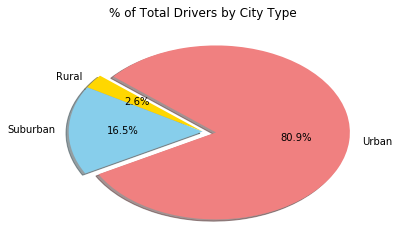

In [32]:
# Calculate Driver Percents
driver_group=city.groupby("type")
total_driver=city["driver_count"].sum()
driver_type=driver_group["driver_count"].sum()
driver_percent=driver_type/total_driver

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
# The colors of each section of the pie chart
colors = ["gold","skyblue","lightCoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
# Save Figure
plt.pie(driver_percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.savefig("../Images/pie3.png")


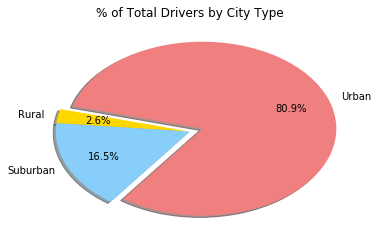

In [6]:
# Show Figure
plt.show()